# 2. K-Means Analysis

In [1]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.collections import PathCollection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Choice of attributes

In [2]:
df_01_scaled = pd.read_csv('../data/HR_comma_sep_01_scaled.csv', index_col=0)
# choice of attributes: K means works better with quantitative features.
# Euclidean distance is not meaningful for categorical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = np.array(df_01_scaled[numerical_features])

## Kmeans

### choice of best value of k

In [3]:
# choice of best value of  K that minimizes the sum of squared error
sse_list = list([0] * 49)
silhouette_list = list([0] * 49)
max_k = 50

for k in range(2, max_k + 1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, n_jobs=-1)
    kmeans.fit(train_data)
    sse_list[k-2] = kmeans.inertia_
    silhouette_list[k-2] = silhouette_score(train_data, kmeans.labels_) 

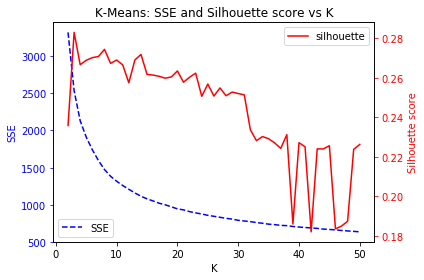

In [32]:
# plot SSE and silhouette on the same scale
# first axis
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k+1), sse_list, '--' 'b', label='SSE')
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='lower left')
# second axis
ax2 = ax1.twinx()
ax2.plot(range(2, max_k+1), silhouette_list, 'red', label='silhouette')
ax2.set_ylabel('Silhouette score', color='red')
ax2.tick_params('y', colors='red')
ax2.legend(loc='best')

plt.title('K-Means: SSE and Silhouette score vs K')
fig.tight_layout()
plt.savefig('sse_silhouette_vs_k.png')
plt.show()
# a way to chose the best k is to look at the 'elbow point' that is the point where the sse drops significantly.

### find elbow point

In [22]:
print 'max silhouette:', np.max(silhouette_list), 'arg:', np.argmax(silhouette_list), 'k:', np.argmax(silhouette_list)+2
print 'min silhouette:', np.min(silhouette_list), 'arg:', np.argmin(silhouette_list), 'k:', np.argmin(silhouette_list)+2
print 'max sse:', np.max(sse_list), 'arg:', np.argmax(sse_list), 'k:', np.argmax(sse_list)+2
print 'min sse:', np.min(sse_list), 'arg:', np.argmin(sse_list), 'k:', np.argmin(sse_list)+2

diffs = [0] * len(sse_list)
max_sse = np.max(sse_list)
for i in range(1, len(sse_list)-2):
    diffs[i] = abs(sse_list[i] - sse_list[i-1])  # diffs[1] is the difference in SSE between k=3 and k=2

print 'max sse diffs:', np.max(diffs), 'arg:', np.argmax(diffs), 'sse:', sse_list[np.argmax(diffs)], 'silhouette:', silhouette_list[np.argmax(diffs)]
print 'min sse diffs:', np.min(diffs), 'arg:', np.argmin(diffs), 'sse:', sse_list[np.argmin(diffs)], 'silhouette:', silhouette_list[np.argmin(diffs)]
n = 10
top_diffs_args = (-np.array(diffs)).argsort()[:n]
top_silho_args = (-np.array(silhouette_list)).argsort()[:n]
print 'top', n, 'diffs args:', top_diffs_args, '--> k:', top_diffs_args + 2  # add +2 to get corresponding k
print 'top', n, 'silhouette args:', top_silho_args, '--> k:', top_silho_args + 2

max silhouette: 0.282945397826 arg: 1 k: 3
min silhouette: 0.182137144502 arg: 40 k: 42
max sse: 3315.02944927 arg: 0 k: 2
min sse: 640.005266599 arg: 48 k: 50
max sse diffs: 781.914661401 arg: 1 sse: 2533.11478787 silhouette: 0.282945397826
min sse diffs: 0.0 arg: 0 sse: 3315.02944927 silhouette: 0.235882726558
top 10 diffs args: [ 1  2  3  4  5  6  7  8  9 10] --> k: [ 3  4  5  6  7  8  9 10 11 12]
top 10 silhouette args: [ 1  6 12  5  4 11  8  3  7  2] --> k: [ 3  8 14  7  6 13 10  5  9  4]


diffs: [0, 781.89784516867076, 403.78594650543937, 219.66309429895932, 169.60928383780242, 143.92942613246282, 121.14061169273987, 89.814029321581074, 66.933928238726139, 55.385007975160306, 52.663965094194509, 45.755133812410804, 47.551748907390902, 34.771408873182736, 29.884111362916883, 28.130090967670412, 25.069268864073479, 22.134149985846648, 26.40870103164491, 20.689570431820584, 15.725019144814155, 16.354535802401188, 19.963709853569526, 16.272355317134497, 13.303618111979631, 12.665448112056765, 13.377697767972222, 15.812152655216209, 9.7316827917214823, 12.735348455134044, 8.4471966303640329, 10.950065123873287, 8.4533470425767518, 10.713119059420137, 7.7729223784122041, 8.076148087915044, 9.0893670649478508, 11.387375501627275, 3.8992203533133534, 6.8560251688434164, 7.3401515226358924, 7.5121757487723926, 4.1808833900478248, 7.0480573340344108, 6.3321554956487489, 6.5766235667537103, 9.8245201950882119, 0, 0]


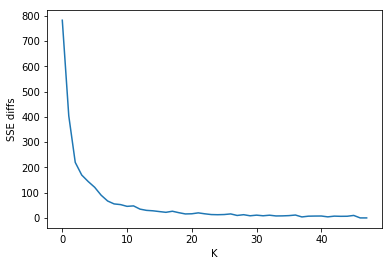

In [15]:
print 'diffs:', diffs

plt.plot(range(len(diffs[1:])), diffs[1:])
plt.ylabel("SSE diffs")
plt.xlabel("K")
plt.show()

In [27]:
# another approach: from the SSE graph select the point with minimum distance from the origin
scaler_x, scaler_y = MinMaxScaler(), MinMaxScaler()
xs = scaler_x.fit_transform(np.array([i for i in range(len(sse_list))]).reshape(-1,1))
ys = scaler_y.fit_transform(np.array(sse_list).reshape(-1,1))

distances_from_origin = [np.linalg.norm([x,y]) for x,y in zip(xs,ys)]
argmin_distances = np.argmin(distances_from_origin)
k = argmin_distances + 2
print 'elbow point: (k= %d, sse = %f, silhouette = %f)' % (k, sse_list[k-2],  silhouette_list[k-2])

elbow point: (k= 12, sse = 1210.194007, silhouette = 0.257388)


In [33]:
chosen_k = 8
print 'elbow point: (k= %d, sse = %f, silhouette = %f)' % (chosen_k, sse_list[chosen_k-2],  silhouette_list[chosen_k-2])

elbow point: (k= 8, sse = 1474.991067, silhouette = 0.274363)


In [53]:
# analysis of the k centroids for a chosen k
kmeans = KMeans(n_clusters=chosen_k)
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
# 2D PCA highlighting the clusters
pca = PCA(n_components=2)
X_scaled_2D = pca.fit_transform(train_data)

In [20]:
type(plt.scatter([1], [2], c='r'))
l = [PathCollection] * 10
print len(l), type(l[0])

10 <type 'type'>


In [25]:
# plot PCA
# color_list = plt.cm.Set3(np.linspace(0, 1, 12)) (Set3, tab20)
colors = cm.rainbow(np.linspace(0, 1, chosen_k))
labels = [PathCollection] * len(colors)
for i in range(0, X_scaled_2D.shape[0]):
    x, y = X_scaled_2D[i, 0], X_scaled_2D[i, 1]
    label_i = kmeans.labels_[i]
    c = colors[label_i]
    labels[label_i] = plt.scatter(x, y, c=colors[label_i], alpha=0.5)
 

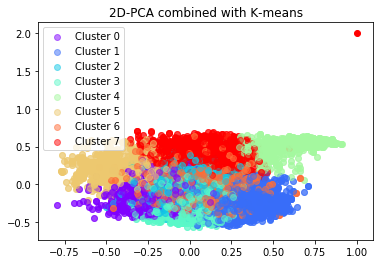

In [26]:
plt.legend([l for l in labels], ['Cluster %d' % i for i in range(0, len(labels))])    
plt.title('2D-PCA combined with K-means')
plt.savefig('../images/pca_kmeans.png')
plt.show()
# TODO: explore who is that red dot in the top-right

## Analysis of k centroids

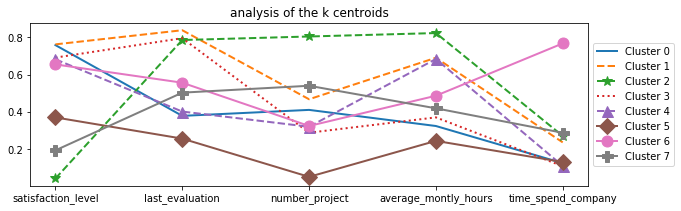

In [91]:
markers = ['-', '--', '--*', ':', '--^', '-D', '-o', '-P']
plt.figure(1, figsize=(10, 3))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(range(0, train_data.shape[1]), kmeans.cluster_centers_[i], markers[i], label='Cluster %s' % i, linewidth=2, 
            markersize=11)
plt.xticks(range(0, train_data.shape[1]), list(df_01_scaled.columns))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('analysis of the k centroids')
plt.savefig('k-centroids_analysis.png')
plt.show()

### compare distributions of features within clusters (and the entire dataset)

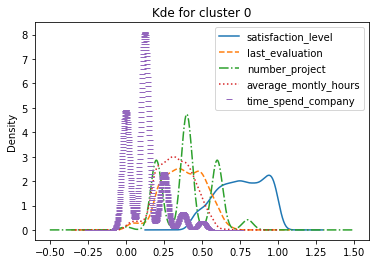

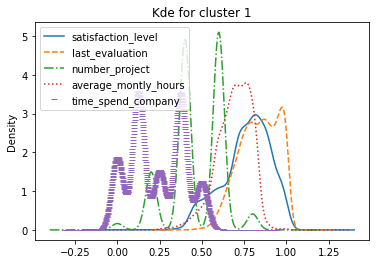

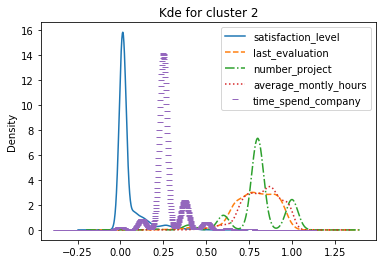

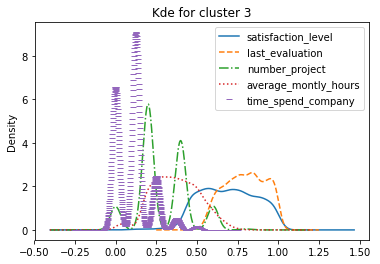

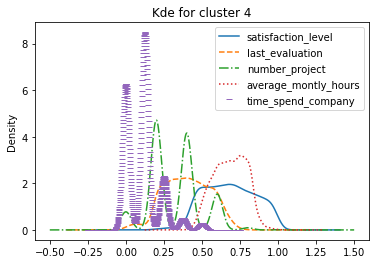

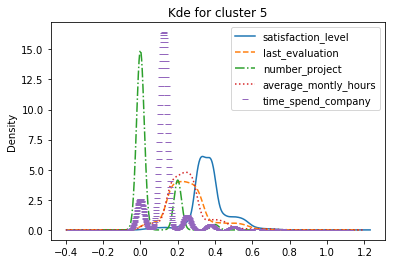

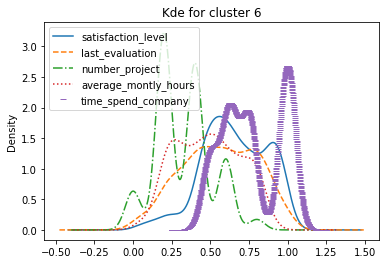

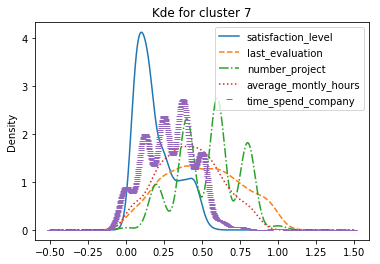

In [81]:
markers = ['-', '--', '-.', ':', '_']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'][:len(numerical_features)]
df_cluster = pd.DataFrame(train_data, columns=numerical_features)
df_cluster['cluster'] = kmeans.labels_
alpha = 1
for i in range(chosen_k):
    cluster_i = df_cluster[df_cluster['cluster'] == i][numerical_features]
    #plt.figure(figsize=(10, 10))
    for marker, col in zip(markers, cluster_i):
        cluster_i[col].plot(kind='kde', style=marker)
    plt.title('Kde for cluster %d' % i)
    plt.legend()
    plt.savefig('../images/kde_within_clusters_c' + str(i) + '.png')
    plt.show()
    
# TODO: evaluate numerically, too many clusters

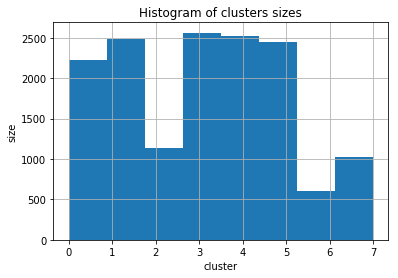

In [57]:
# cluster's size histogram
df_cluster['cluster'].hist(bins=chosen_k)
plt.xlabel('cluster')
plt.ylabel('size')
plt.title('Histogram of clusters sizes')
plt.savefig('../images/kmeans_cluster_size_hist.png')
plt.show()